In [4]:
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf

from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
cf.go_offline()

In [5]:
data = pd.read_csv('data/churn.csv')

In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MonthLevel', 'TotalLevel', 'TenureLevel', 'ChurnBinary'],
      dtype='object')

In [11]:
data['ChurnBinary'].unique()

array([0., 1.])

In [13]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthLevel,TotalLevel,TenureLevel,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low,Very Low,New,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,Low,Moderate,Loyal,0.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Low,Very Low,New,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Low,Moderate,Loyal,0.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moderate,Very Low,New,1.0


In [10]:
def survival(data, group_field, time_field, event_field):
    model = KaplanMeierFitter()
    results = []
    
    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        model.fit(T, E, label=str(i))
        results.append(model.survival_function_)
    
    survival = pd.concat(results, axis=1)
    return survival

In [12]:
rates = survival(data, 'gender', 'tenure', 'ChurnBinary')

rates.iplot(kind='line', xTitle='Tenure (Months)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and Gender')

In [14]:
rates = survival(data, 'SeniorCitizen', 'tenure', 'ChurnBinary')

rates.iplot(kind='line', xTitle='Tenure (Months)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and SeniorCitizen')

In [16]:
rates = survival(data, 'Contract', 'tenure', 'ChurnBinary')

rates.iplot(kind='line', xTitle='Tenure (Months)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and Contract')

In [22]:
import numpy as np

In [23]:
lung  = pd.read_csv('data/lung.csv')

In [24]:
lung['death'] = np.where(lung['status'] == 1,0,1)

In [25]:
print(lung['sex'].unique())

[1 2]


In [26]:
lung

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,death
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
223,224,1.0,188,1,77,1,1.0,80.0,60.0,NaN,3.0,0
224,225,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0,0
225,226,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0,0
226,227,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0,0


In [27]:
model = KaplanMeierFitter()

In [29]:
model.fit(durations = lung['time'], event_observed= lung['death'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

In [30]:
model.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [ ]:
#removed = observed+ censored
#censored = personas que no murieron
#obser = personas que murieron

In [38]:
model.predict(730)

0.11569309834453906

<AxesSubplot:xlabel='timeline'>

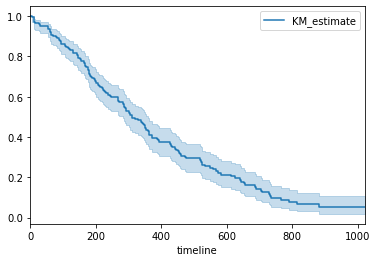

In [37]:
model.plot()

In [39]:
model.survival_function_

,KM_estimate
timeline,
0.0,1.000000
5.0,0.995614
11.0,0.982456
12.0,0.978070
13.0,0.969298
...,...
840.0,0.067127
883.0,0.050346
965.0,0.050346


In [40]:
model.median_survival_time_

310.0

<AxesSubplot:xlabel='timeline'>

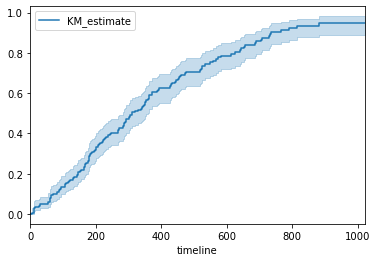

In [42]:
model.plot_cumulative_density()

In [44]:
from lifelines import NelsonAalenFitter

In [46]:
model = NelsonAalenFitter()

In [47]:
model.fit(durations = lung['time'], event_observed= lung['death'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 228 total observations, 63 right-censored observations>

In [49]:
model.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


<AxesSubplot:xlabel='timeline'>

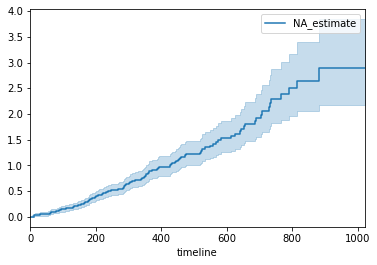

In [50]:
model.plot_cumulative_hazard()

In [51]:
model.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017660
12.0,0.022125
13.0,0.031114
...,...
840.0,2.641565
883.0,2.891565
965.0,2.891565
